# Import Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.set_option('display.max_columns',None)

numpy version :  1.23.2
pandas version :  1.4.3
seaborn version :  0.11.2


In [ ]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Data Collection 

In [ ]:
df = pd.read_csv('flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


Pada kolom `WORK_CITY` terdapat data yang berisikan '.' (titik). Ubah ke NaN

In [ ]:
df[df['WORK_CITY'] == '.']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
20,21501,7/30/2008,11/21/2008,Male,6,.,beijing,CN,49.0,3/31/2014,106,220641,69566.0,122763.0,167113,3/28/2014,4,6.438095,31,4,1.369404,251134,9
27,47114,1/15/2005,3/17/2005,Male,6,.,beijing,CN,47.0,3/31/2014,74,209810,101398.0,83139.0,148685,3/21/2014,11,9.493151,51,8,1.433364,235176,14
40,18793,4/25/2006,6/2/2006,Male,6,.,beijing,CN,48.0,3/31/2014,98,191809,88788.0,85119.0,137876,3/30/2014,2,7.505155,46,11,1.458541,210435,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61806,4388,4/20/2011,12/10/2011,Male,4,.,beijing,CN,40.0,3/31/2014,2,634,756.0,0.0,1586,2/1/2013,425,1.000000,1,0,0.571627,634,0
62035,10787,8/29/2012,10/16/2013,Male,6,.,beijing,CN,55.0,3/31/2014,2,776,0.0,1044.0,1199,10/18/2013,166,2.000000,2,0,0.707698,1133,3
62099,41502,1/1/2012,1/1/2012,Female,4,.,shanghai,CN,44.0,3/31/2014,2,692,NaN,0.0,2085,6/5/2012,666,2.000000,2,0,0.400000,692,0
62546,15528,6/3/2012,6/3/2012,Male,4,.,beijing,CN,44.0,3/31/2014,2,576,970.0,0.0,1629,3/14/2013,384,284.000000,284,0,0.417772,576,0


In [ ]:
df['WORK_CITY'] = df['WORK_CITY'].str.replace(r'^(.)$', '')

In [ ]:
df[df['WORK_CITY'] == '.']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


In [ ]:
df['WORK_CITY'] = df['WORK_CITY'].replace(r'^\s*$', np.nan, regex=True)
df

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,NaN,beijing,CN,31.0,3/31/2014,210,505308,239560.0,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,140,362480,171483.0,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,NaN,beijing,CN,40.0,3/31/2014,135,351159,163618.0,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,23,337314,116350.0,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,152,273844,124560.0,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,2,0,0.0,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,4,0,0.0,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,2,0,0.0,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0
62986,61027,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,2,0,0.0,0.0,3934,2/26/2013,400,12.000000,12,0,0.000000,0,0


# Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          59907 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

# Data Preprocessing 

## Check Null and Missing Values 

In [ ]:
df_null = df.isnull().sum().reset_index()
df_null.columns = ['feature','missing_value']
df_null['percentage'] = round((df_null['missing_value']/len(df))*100,3)
df_null = df_null.sort_values('percentage', ascending=False).reset_index(drop=True)
df_null = df_null[df_null['percentage']>0]
df_null

,feature,missing_value,percentage
0,WORK_PROVINCE,3248,5.157
1,WORK_CITY,3081,4.891
2,SUM_YR_1,551,0.875
3,AGE,420,0.667
4,SUM_YR_2,138,0.219
5,WORK_COUNTRY,26,0.041
6,GENDER,3,0.005


Pada kolom `SUM_YR_1`, `AGE`, `SUM_YR_2`, `WORK_COUNTRY`, dan `GENDER` memiliki missing value di bawah 1%, remove semua rows yang memiliki missing value. Sedangkan, `WORK_PROVINCE` dan `WORK_CITY` isi missing value dengan mode.

In [ ]:
missing_col = ['SUM_YR_1', 'AGE', 'SUM_YR_2', 'WORK_COUNTRY', 'GENDER']
for col in missing_col:
  df.dropna(subset=[col], inplace=True)

In [ ]:
df['WORK_PROVINCE'] = df['WORK_PROVINCE'].fillna(df['WORK_PROVINCE'].mode()[0])
df['WORK_CITY'] = df['WORK_CITY'].fillna(df['WORK_CITY'].mode()[0])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61856 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          61856 non-null  int64  
 1   FFP_DATE           61856 non-null  object 
 2   FIRST_FLIGHT_DATE  61856 non-null  object 
 3   GENDER             61856 non-null  object 
 4   FFP_TIER           61856 non-null  int64  
 5   WORK_CITY          61856 non-null  object 
 6   WORK_PROVINCE      61856 non-null  object 
 7   WORK_COUNTRY       61856 non-null  object 
 8   AGE                61856 non-null  float64
 9   LOAD_TIME          61856 non-null  object 
 10  FLIGHT_COUNT       61856 non-null  int64  
 11  BP_SUM             61856 non-null  int64  
 12  SUM_YR_1           61856 non-null  float64
 13  SUM_YR_2           61856 non-null  float64
 14  SEG_KM_SUM         61856 non-null  int64  
 15  LAST_FLIGHT_DATE   61856 non-null  object 
 16  LAST_TO_END        618

In [ ]:
df_null = df.isnull().sum().reset_index()
df_null.columns = ['feature','missing_value']
df_null['percentage'] = round((df_null['missing_value']/len(df))*100,3)
df_null = df_null.sort_values('percentage', ascending=False).reset_index(drop=True)
df_null = df_null[df_null['percentage']>0]
df_null

,feature,missing_value,percentage


Tidak ada missing value

## Duplicate Values

In [ ]:
df.duplicated().sum()

0

Tidak ada duplikat data

## FEATURE ENGINEERING

Pada kolom `LAST_FLIGHT_DATE` terdapat tanggal 2014/2/29, dimana seharusnya tidak ada tanggal tersebut

In [ ]:
df[df['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,53,116307,30884.0,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,31,96739,26510.0,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,guangzhou,beijing,CN,39.0,3/31/2014,49,84754,28693.0,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,80,61418,32900.0,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,27,65918,23892.0,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,3,0,0.0,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,2,854,0.0,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,2,838,0.0,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,guangdong,CN,42.0,3/31/2014,2,276,0.0,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


In [ ]:
print('Incorrect `LAST_FLIGHT_DATE` data percentage: ', end='\n\n')
print(str(round(df[df.LAST_FLIGHT_DATE.str.contains('2014/2/29')]['LAST_FLIGHT_DATE'].count()/len(df), 3)), '%')

Incorrect `LAST_FLIGHT_DATE` data percentage: 

0.007 %


Drop kolom `LAST_FLIGHT_DATE` karena persentase datanya kecil

In [ ]:
df.drop(df[df['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00'].index,inplace=True)
df[df['LAST_FLIGHT_DATE'] == '2014/2/29  0:00:00']

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight


Membuat feature baru `MEMBER_TIME` yaitu dengan mengurangkan terakhir kali dataset diambil (`LOAD_TIME`) dengan saat bergabung (`FFP_DATE`)

## Customize Data Type

In [ ]:
#Ubah data type pada kolom AGE dari float64 ke int64
df['AGE'] = df['AGE'].astype(int) 

#Ubah data type pada kolom FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE dari object ke datetime
date_col = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE']
for col in date_col:
  df[col] = pd.to_datetime(df[col])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61437 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          61437 non-null  int64         
 1   FFP_DATE           61437 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  61437 non-null  datetime64[ns]
 3   GENDER             61437 non-null  object        
 4   FFP_TIER           61437 non-null  int64         
 5   WORK_CITY          61437 non-null  object        
 6   WORK_PROVINCE      61437 non-null  object        
 7   WORK_COUNTRY       61437 non-null  object        
 8   AGE                61437 non-null  int32         
 9   LOAD_TIME          61437 non-null  datetime64[ns]
 10  FLIGHT_COUNT       61437 non-null  int64         
 11  BP_SUM             61437 non-null  int64         
 12  SUM_YR_1           61437 non-null  float64       
 13  SUM_YR_2           61437 non-null  float64       
 14  SEG_KM

In [ ]:
df['MEMBER_TIME'] = ((df['LOAD_TIME'] - df['FFP_DATE'])/np.timedelta64(1, 'M'))
df['MEMBER_TIME'] = df['MEMBER_TIME'].astype(int)

## Statistical Summary

In [ ]:
#numericals columns
num_col = list(df._get_numeric_data().columns)
print(num_col)

['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight', 'MEMBER_TIME']


In [ ]:
#categoricals columns
cat_col = [i for i in df.columns if i not in num_col]
print(cat_col)

['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']


In [ ]:
# numerical statistical sumary
df[num_col].describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_TIME
count,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000,61437.000000
mean,31486.068346,4.103260,42.496281,11.939776,11023.455312,5371.931577,5647.021518,17276.042710,173.565880,68.182230,167.320198,0.323730,0.721644,12660.916500,2.757947,48.215310
std,18185.683471,0.375856,9.888107,14.118982,16407.296822,8131.393893,8707.188825,21054.585569,181.477696,77.774203,123.150092,1.145186,0.184845,20614.743676,7.403055,27.819963
min,2.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000
25%,15724.000000,4.000000,35.000000,3.000000,2584.000000,1020.000000,820.000000,4849.000000,28.000000,23.714286,81.000000,0.000000,0.612500,2838.000000,0.000000,24.000000
50%,31473.000000,4.000000,41.000000,7.000000,5780.000000,2811.000000,2808.000000,10149.000000,107.000000,45.000000,144.000000,0.000000,0.711781,6420.000000,0.000000,41.000000
75%,47249.000000,4.000000,48.000000,15.000000,12942.000000,6590.000000,6890.000000,21431.000000,262.000000,82.500000,229.000000,0.000000,0.808987,14425.000000,1.000000,71.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000,112.000000


In [ ]:
# describe method on categorical data
df[cat_col].describe()

,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,61437,61437,61437,61437,61437,61437,61437,61437
unique,3067,3404,2,3169,1149,117,1,730
top,2011-01-13 00:00:00,2013-02-16 00:00:00,Male,guangzhou,guangdong,CN,2014-03-31 00:00:00,2014-03-31 00:00:00
freq,182,92,46972,12199,20331,56333,61437,956
first,2004-11-01 00:00:00,1905-12-31 00:00:00,NaN,NaN,NaN,NaN,2014-03-31 00:00:00,2012-04-01 00:00:00
last,2013-03-31 00:00:00,2015-05-30 00:00:00,NaN,NaN,NaN,NaN,2014-03-31 00:00:00,2014-03-31 00:00:00


## Numeric Distribution and Outlier

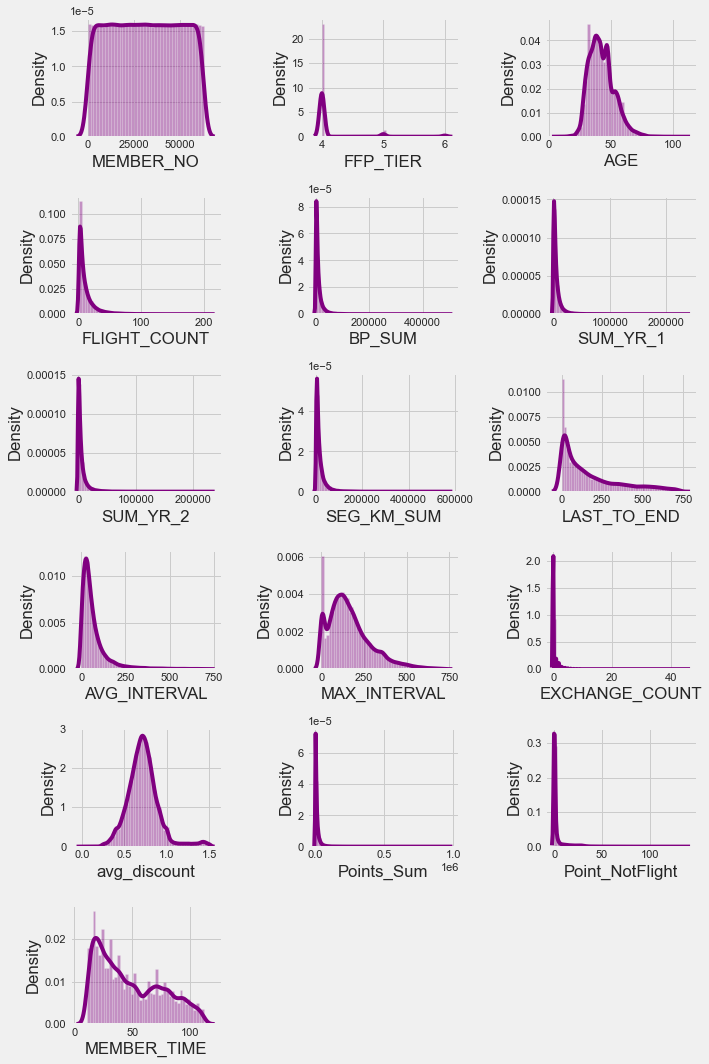

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(10, 15))

features = num_col
for i in range(0, len(features)):
    plt.subplot(6, 3, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df[features[i]], color='purple')
    plt.xlabel(features[i])
    plt.tight_layout()

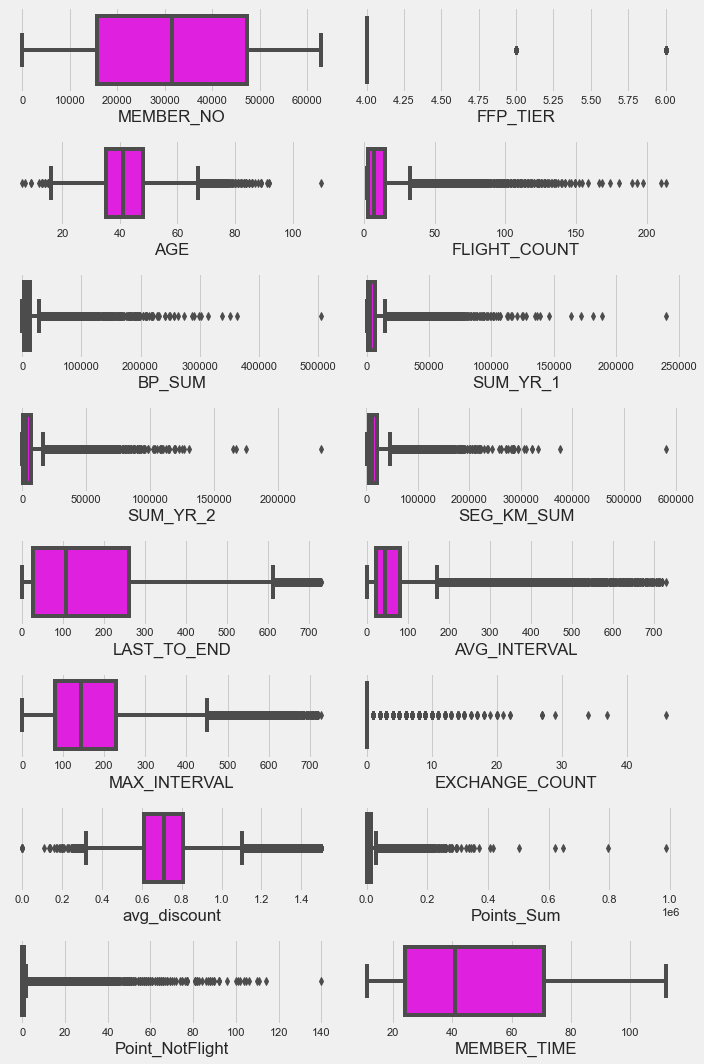

In [ ]:
plt.figure(figsize=(10, 15))
for i in range(0, len(num_col)):
    plt.subplot(8, 2, i+1)
    sns.boxplot(x=df[num_col[i]], color='magenta')
    plt.tight_layout()

plt.show()

## Feature Selection

RFM adalah model yang paling banyak digunakan dalam menentukan customer relationship management. RFM terdiri dari :
- R (Recency) : the most recent consumption
- F (Frequency) : the frequency of consumption
- M (Monetary) : the total amount of consumption

Dataset berisikan airline customers, jadi diperlukan untuk menggabungkan teori RFM dengan realitas airline. Maka, menggunakan model LRFMC. Model ini terdiri dari :
- L (length of customer's membership) : Interval antara bergabung dan waktu saat ini -> `MEMBER_TIME`
- R (consumption interval) : Interval antara waktu pemakaian terakhir dan waktu saat ini -> `LAST_TO_END`
- F (consumption frequency) : Jumlah penerbangan pelanggan -> `FLIGHT_COUNT`
- M (total flight miles) : Total jarak (km) penerbangan yang telah dilakukan -> `SEG_KM_SUM`
- C (mean value of cabin discount coefficient) : Nilai rata-rata faktor diskon yang sesuai dengan kelas dari kabin -> `avg_discount`

In [ ]:
df_select = df.copy()
df_select = df_select[['MEMBER_TIME','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
df_select.sample(5)

,MEMBER_TIME,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
3116,28,147,30,59010,0.729333
52954,29,33,4,4693,0.493318
10915,96,107,11,30447,0.675927
51549,39,40,5,4244,0.593254
52598,12,214,2,2743,0.863580


## Handling Outliers

In [ ]:
fil_ent = np.array([True] * len(df))
for col in ['MEMBER_TIME','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']:
    Q1 = df_select[col].quantile(0.25)
    Q3 = df_select[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    fil_ent = ((df_select[col] >= low_limit) & (df_select[col] <= high_limit)) & fil_ent
    
df_clean = df_select[fil_ent]

In [ ]:
df_clean.head()

,MEMBER_TIME,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
2188,80,16,28,46152,1.098501
2458,88,16,29,43790,1.099567
2516,71,108,8,45604,1.042694
2630,44,7,29,44033,1.059304
2664,76,436,6,45460,1.019714


## Correlation Matrix 

<AxesSubplot:>

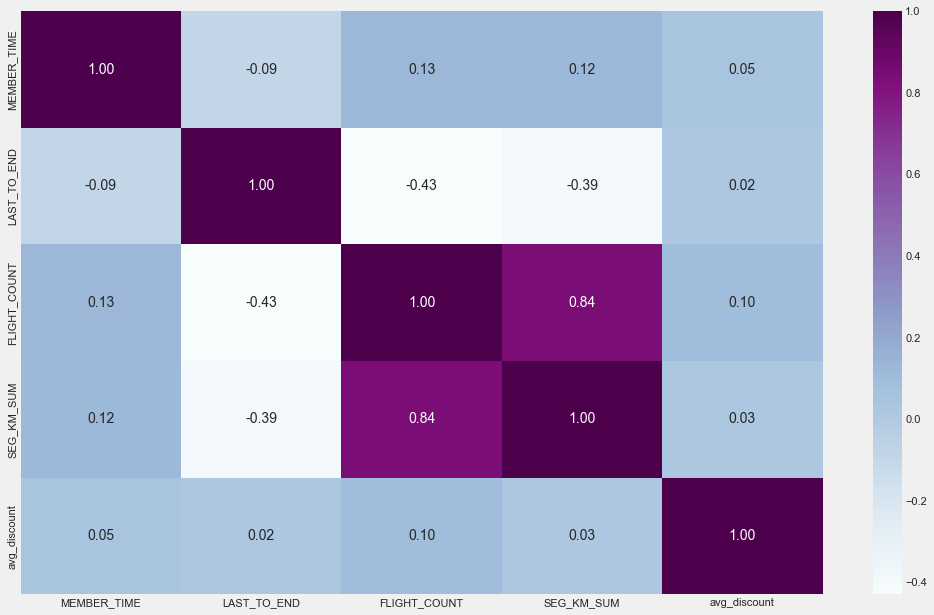

In [ ]:
corr_= df_clean.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "BuPu")

## Scaling

Pada kolom `MEMBER_TIME`, `LAST_TO_END`, `FLIGHT_COUNT`, `SEG_KM_SUM` scaling dengan normalization karena data memiliki positive skewed distribution. Sedangkan kolom `avg_discount` scaling dengan standardization karena data memiliki normal distribution.

In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

nor_col = ['MEMBER_TIME', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']

for col in std_col:
  df_clean[col + '_NOR'] = MinMaxScaler().fit_transform(df_clean[col].values.reshape(len(df_clean), 1))

# Normalization
df_clean['avg_discount_STD'] = StandardScaler().fit_transform(df_clean['avg_discount'].values.reshape(len(df_clean), 1))

In [ ]:
df_clean.describe()

,MEMBER_TIME,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount,MEMBER_TIME_NOR,LAST_TO_END_NOR,FLIGHT_COUNT_NOR,SEG_KM_SUM_NOR,avg_discount_STD
count,51626.000000,51626.000000,51626.000000,51626.000000,51626.000000,51626.000000,51626.000000,51626.000000,51626.000000,5.162600e+04
mean,46.910685,170.067853,8.806648,12467.357165,0.699102,0.355551,0.276255,0.219569,0.263396,4.492332e-16
std,27.423190,161.797106,7.022970,9932.837436,0.144697,0.271517,0.264374,0.226547,0.216232,1.000010e+00
min,11.000000,1.000000,2.000000,368.000000,0.317898,0.000000,0.000000,0.000000,0.000000,-2.634518e+00
25%,23.000000,37.000000,3.000000,4756.250000,0.603492,0.118812,0.058824,0.032258,0.095530,-6.607672e-01
50%,40.000000,116.000000,6.000000,9296.500000,0.702035,0.287129,0.187908,0.129032,0.194368,2.027022e-02
75%,69.000000,259.000000,12.000000,17584.750000,0.796553,0.574257,0.421569,0.322581,0.374799,6.734866e-01
max,112.000000,613.000000,33.000000,46304.000000,1.103630,1.000000,1.000000,1.000000,1.000000,2.795707e+00


In [ ]:
df_select_std = df_clean.copy()
df_select_std = df_select_std[['MEMBER_TIME_NOR', 'LAST_TO_END_NOR', 'FLIGHT_COUNT_NOR', 'SEG_KM_SUM_NOR', 'avg_discount_STD']]

In [ ]:
df_select_std.sample(5)

,MEMBER_TIME_NOR,LAST_TO_END_NOR,FLIGHT_COUNT_NOR,SEG_KM_SUM_NOR,avg_discount_STD
60487,0.435644,0.650327,0.000000,0.018700,1.752833
61428,0.138614,0.245098,0.000000,0.020790,0.354106
9272,0.336634,0.104575,0.516129,0.684975,0.189367
38871,0.366337,0.416667,0.129032,0.135340,0.316996
60011,0.831683,0.037582,0.000000,0.037966,-0.728488


# Evaluasi

## Inertia

<AxesSubplot:>

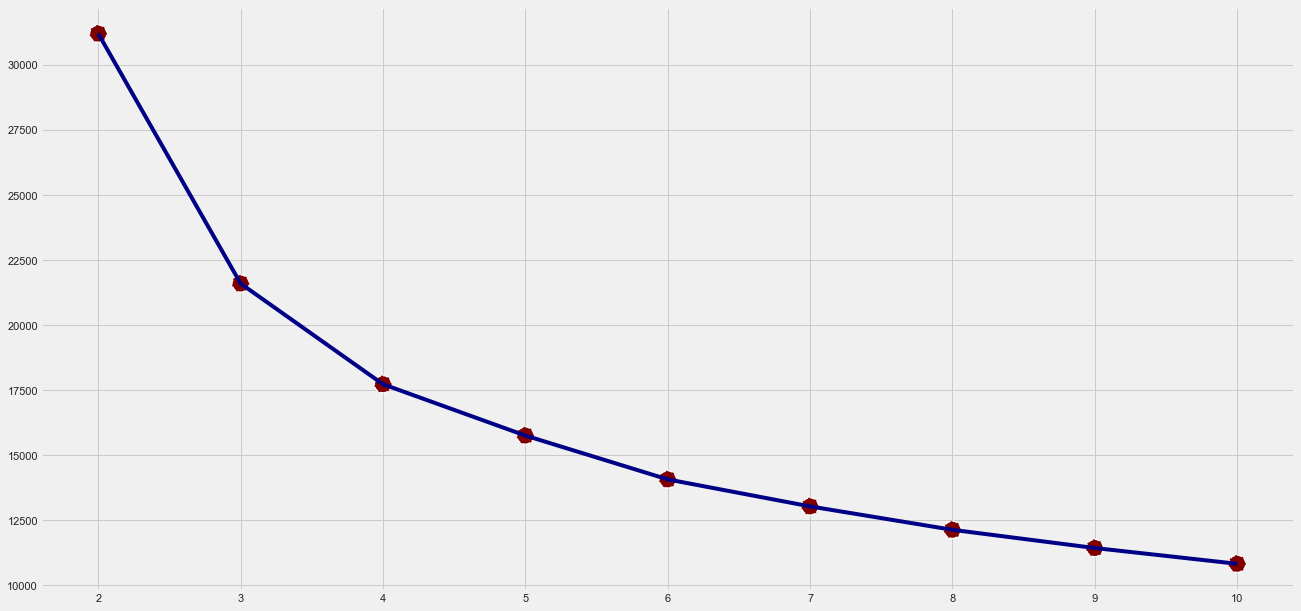

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_select_std)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


## Create Clusters
Dilihat dari evaluasi menggunakan Inertia, diperoleh informasi jumlah cluster yang ideal adalah 4 cluster.

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_select_std)
clusters = kmeans.labels_
df_clean['clusters'] = clusters
df_clean.sample(5)

,MEMBER_TIME,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount,MEMBER_TIME_NOR,LAST_TO_END_NOR,FLIGHT_COUNT_NOR,SEG_KM_SUM_NOR,avg_discount_STD,clusters
16391,109,54,13,18900,0.782058,0.970297,0.086601,0.354839,0.403431,0.573311,2
23568,72,67,11,15552,0.659104,0.603960,0.107843,0.290323,0.330547,-0.276429,0
17004,20,543,3,16416,0.870882,0.089109,0.885621,0.032258,0.349356,1.187177,1
31081,83,44,7,9586,0.742417,0.712871,0.070261,0.161290,0.200670,0.299350,2
22657,38,414,3,11508,0.933333,0.267327,0.674837,0.032258,0.242511,1.618780,1


## Clusters Analysis
### Dimensionality Reduction for Visualization

In [ ]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(df_select_std)
pcs = pca.transform(df_select_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,2.781873,0.921063
1,2.790745,0.933249
2,2.380678,0.445550
3,2.506472,0.833353
4,2.224324,0.115065


In [ ]:
df_pca['clusters'] = clusters
df_pca

,PC 1,PC 2,clusters
0,2.781873,0.921063,1
1,2.790745,0.933249,1
2,2.380678,0.445550,1
3,2.506472,0.833353,1
4,2.224324,0.115065,1
...,...,...,...
51621,0.349270,-0.459695,2
51622,0.343270,-0.567368,2
51623,-2.421579,-0.484502,3
51624,0.075625,-0.032486,2


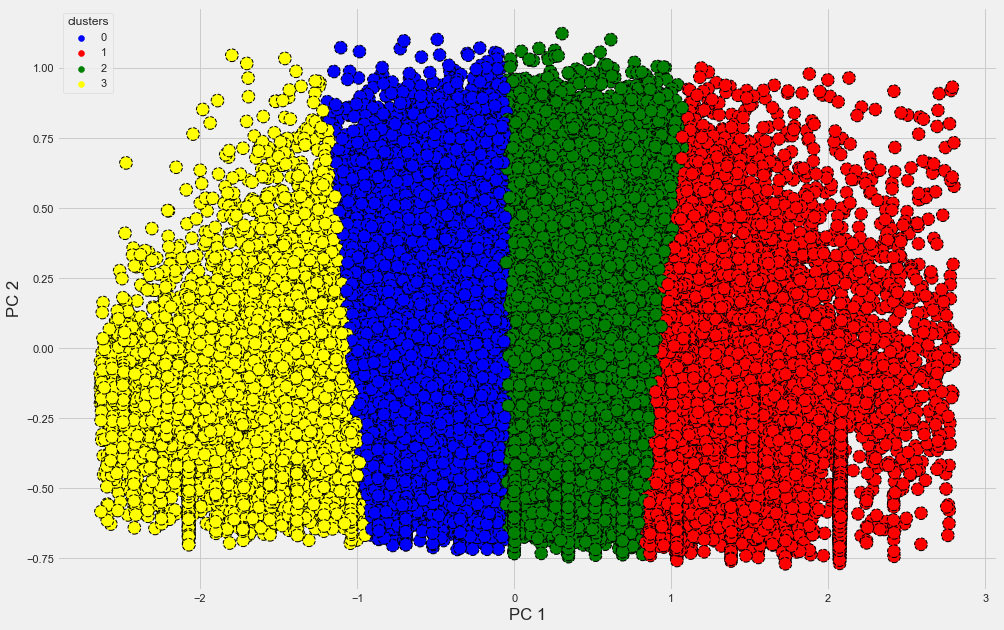

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    edgecolor='black',
    linestyle='--',
    data=df_pca,
    palette=['blue','red','green','yellow'],
    s=160,
    ax=ax
)
plt.show()

In [ ]:
df_clean[['MEMBER_TIME', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount', 'clusters']].groupby('clusters').agg(['mean','median'])

MEMBER_TIME        LAST_TO_END        FLIGHT_COUNT         \
                mean median        mean median         mean median   
clusters                                                             
0          47.620465   40.0  149.172733  100.0     9.355043    7.0   
1          47.909416   41.0  210.721874  163.0     7.559047    5.0   
2          47.525377   41.0  154.951670  101.0    10.309321    8.0   
3          42.837865   35.0  202.932721  156.0     5.529810    4.0   

            SEG_KM_SUM          avg_discount            
                  mean   median         mean    median  
clusters                                                
0         13924.096556  10847.0     0.626952  0.630070  
1          9574.237866   6467.5     0.911396  0.900000  
2         14155.662231  11256.5     0.757013  0.753655  
3          8739.997191   6250.0     0.469594  0.483292

In [ ]:
df_clean['clusters'].value_counts().to_frame().reset_index().rename(columns={"index": "clusters", "clusters": "total_members"})

,clusters,total_members
0,2,18560
1,0,16291
2,1,8942
3,3,7833


# Insight

1. Cluster 0 (Mid-low level customer) :
   - Durasi bergabung middle level
   - Interval waktu penerbangan terakhir hingga pesanan penerbangan terakhir low level
   - Jumlah penerbangan pelanggan middle level
   - Total jarak (km) penerbangan yang telah dilakukan middle level
   - Rata-rata diskon yang didapatkan pelanggan mid-Low level
   - Total member cluster 0 middle level


2. Cluster 1 (High level customer) :
   - Durasi bergabung high level
   - Waktu penerbangan terakhir hingga interval pesanan penerbangan terakhir high level
   - Jumlah penerbangan pelanggan mid-Low level
   - Total jarak (km) penerbangan yang telah dilakukan mid-Low level
   - Rata-rata diskon yang didapatkan pelanggan high level
   - Total member cluster 1 mid-Low level
   
   
3. Cluster 2 (Middle level customer) :
   - Durasi bergabung Mid-Low level
   - Waktu penerbangan terakhir hingga interval pesanan penerbangan terakhir Mid-Low level
   - Jumlah penerbangan pelanggan high level
   - Total jarak (km) penerbangan yang telah dilakukan High level
   - Rata-rata diskon yang didapatkan pelanggan Middle level
   - Total member cluster 2 high level
   
   
4. Cluster 3 (Low level customer) :
   - Durasi bergabung low level
   - Waktu penerbangan terakhir hingga interval pesanan penerbangan terakhir low level
   - Jumlah penerbangan pelanggan low level
   - Total jarak (km) penerbangan yang telah dilakukan low level
   - Rata-rata diskon yang didapatkan pelanggan low level
   - Total member cluster 3 low level

## Silhouette score

In [ ]:
range_n_clusters = list(range(2,11))
print(range_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_select_std)
    preds = kmeans.predict(df_select_std)
     
    score_euclidean = silhouette_score(df_select_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)
    print('cluster:',i,'nilai:',score_euclidean)

cluster: 2 nilai: 0.40277190217595055
cluster: 3 nilai: 0.3367284585647847
cluster: 4 nilai: 0.2818924298052168
cluster: 5 nilai: 0.2391906531974024
cluster: 6 nilai: 0.24645108274459
cluster: 7 nilai: 0.24029703012066908
cluster: 8 nilai: 0.2224769633841492
cluster: 9 nilai: 0.22270083801956345
cluster: 10 nilai: 0.22483699013719477


<AxesSubplot:>

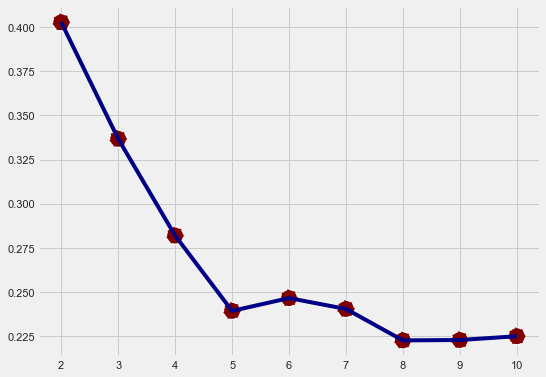

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')

## Create Clusters

Dilihat dari evaluasi menggunakan Silhouette Score, diperoleh informasi jumlah cluster yang ideal adalah 2 cluster.

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_select_std)
clusters = kmeans.labels_
df_clean['clusters'] = clusters
df_clean.sample(5)

,MEMBER_TIME,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount,MEMBER_TIME_NOR,LAST_TO_END_NOR,FLIGHT_COUNT_NOR,SEG_KM_SUM_NOR,avg_discount_STD,clusters
60897,83,335,2,3208,0.342067,0.712871,0.545752,0.000000,0.061825,-2.467489,1
24024,26,80,12,15972,0.627073,0.148515,0.129085,0.322581,0.339690,-0.497798,1
62224,69,156,2,1297,0.616492,0.574257,0.253268,0.000000,0.020224,-0.570925,1
6751,71,10,32,35187,0.809497,0.594059,0.014706,0.967742,0.757989,0.762942,0
28594,79,13,9,15996,0.499516,0.673267,0.019608,0.225806,0.340212,-1.379350,1


## Clusters Analysis
### Dimensionality Reduction for Visualization

In [ ]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(df_select_std)
pcs = pca.transform(df_select_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['clusters'] = clusters
df_pca

,PC 1,PC 2,clusters
0,2.781873,0.921063,0
1,2.790745,0.933249,0
2,2.380678,0.445550,0
3,2.506472,0.833353,0
4,2.224324,0.115065,0
...,...,...,...
51621,0.349270,-0.459695,0
51622,0.343270,-0.567368,0
51623,-2.421579,-0.484502,1
51624,0.075625,-0.032486,0


<AxesSubplot:xlabel='PC 1', ylabel='PC 2'>

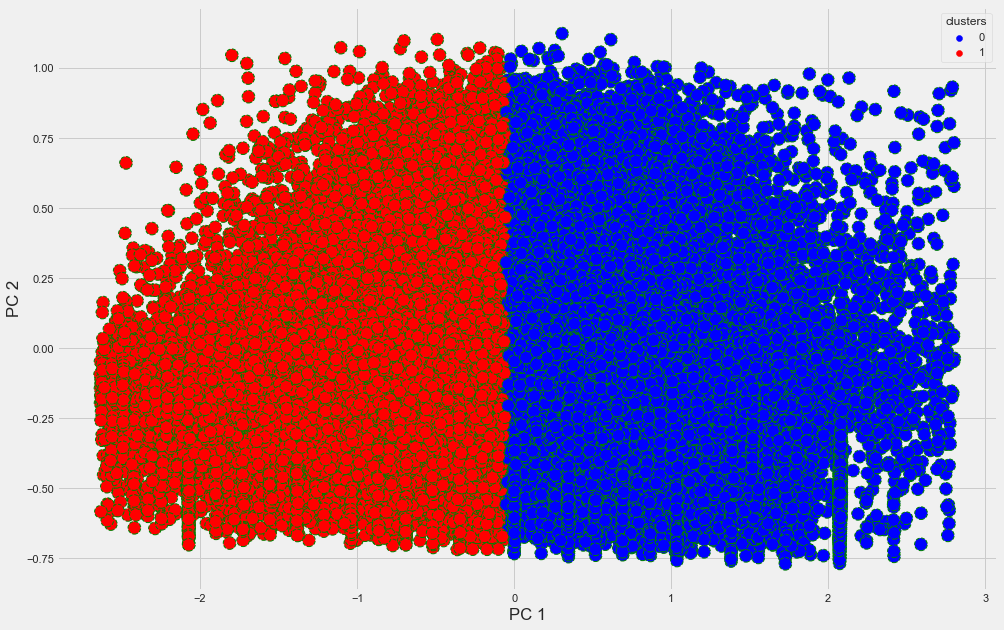

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='green',
    linestyle='--',
    data=df_pca,
    palette=['blue','red'],
    s=160,
    ax=ax
)

In [ ]:
df_clean[['MEMBER_TIME', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount', 'clusters']].groupby('clusters').agg(['mean','median'])

MEMBER_TIME        LAST_TO_END        FLIGHT_COUNT         \
                mean median        mean median         mean median   
clusters                                                             
0          47.685525   41.0  172.874217  117.0     9.412929    7.0   
1          46.018709   39.0  166.837243  115.0     8.108713    6.0   

            SEG_KM_SUM         avg_discount            
                  mean  median         mean    median  
clusters                                               
0         12668.840880  9526.0     0.806685  0.788321  
1         12235.414559  9054.0     0.575257  0.595310

In [ ]:
df_clean['clusters'].value_counts().to_frame().reset_index().rename(columns={"index": "clusters", "clusters": "total_members"})

,clusters,total_members
0,0,27627
1,1,23999


# Insight

1. Cluster 0 (High level customer) :
   - Durasi bergabung high level
   - Waktu penerbangan terakhir hingga interval pesanan penerbangan terakhir high level
   - Jumlah penerbangan pelanggan high level
   - Total jarak (km) penerbangan yang telah dilakukan high level
   - Rata-rata diskon yang didapatkan pelanggan high level
   - Total member cluster 0 high level


2. Cluster 1 (Low level customer) :
   - Durasi bergabung low level
   - Waktu penerbangan terakhir hingga interval pesanan penerbangan terakhir low level
   - Jumlah penerbangan pelanggan low level
   - Total jarak (km) penerbangan yang telah dilakukan low level, pada cluster 1 tidak terlalu jauh dari cluster 0
   - Rata-rata diskon yang didapatkan pelanggan low level
   - Total member cluster 1 low level